##### 0. 필요한 라이브러리 추가 설치
###### Dicom 및 nifti 파일 저장 및 불러오기에 활용할 SimpleITK 라이브러리 설치

In [1]:
!pip install SimpleITK

##### 1. 사용할 라이브러리 임포트
###### 인공지능 모델 학습을 위한 데이터 로드 및 전처리, 학습 과정에서 필요한 라이브러리 임포트

In [2]:
import os
import json
import SimpleITK as sitk
import numpy as np
import cv2
import matplotlib.pyplot as plt

##### 2. 데이터 경로
###### 사용될 데이터 경로 확인 및 설정

In [3]:
# Checking data path
path_data = os.path.join('/nas', 'breast')
path_abimg = os.path.join(path_data, 'image', 'abnormal')
path_nrimg = os.path.join(path_data, 'image', 'normal')

for (path, dir, file) in os.walk(path_data):
    print("path:", path)
    print("dir:", dir)
    print("file:", file)
    print("----------")

## Getting data name
abnameList = sorted([name.split('.')[0] for name in os.listdir(path_abimg) if name.endswith('.dcm')])
nrnameList = sorted([name.split('.')[0] for name in os.listdir(path_nrimg) if name.endswith('.dcm')])

print(f'Abnormal: {len(abnameList)}')
print(f'Normal: {len(nrnameList)}')


path: /nas/breast
dir: ['image', 'label']
file: []
----------
path: /nas/breast/image
dir: ['normal', 'abnormal']
file: []
----------
path: /nas/breast/image/normal
dir: []
file: ['N_250.dcm', 'N_249.dcm', 'N_248.dcm', 'N_247.dcm', 'N_246.dcm', 'N_245.dcm', 'N_244.dcm', 'N_243.dcm', 'N_242.dcm', 'N_241.dcm', 'N_240.dcm', 'N_239.dcm', 'N_238.dcm', 'N_237.dcm', 'N_236.dcm', 'N_235.dcm', 'N_234.dcm', 'N_233.dcm', 'N_232.dcm', 'N_231.dcm', 'N_230.dcm', 'N_229.dcm', 'N_228.dcm', 'N_227.dcm', 'N_226.dcm', 'N_225.dcm', 'N_224.dcm', 'N_223.dcm', 'N_222.dcm', 'N_221.dcm', 'N_220.dcm', 'N_219.dcm', 'N_218.dcm', 'N_217.dcm', 'N_216.dcm', 'N_215.dcm', 'N_214.dcm', 'N_213.dcm', 'N_212.dcm', 'N_211.dcm', 'N_210.dcm', 'N_209.dcm', 'N_208.dcm', 'N_207.dcm', 'N_206.dcm', 'N_205.dcm', 'N_204.dcm', 'N_203.dcm', 'N_202.dcm', 'N_201.dcm', 'N_200.dcm', 'N_199.dcm', 'N_198.dcm', 'N_197.dcm', 'N_196.dcm', 'N_195.dcm', 'N_194.dcm', 'N_193.dcm', 'N_192.dcm', 'N_191.dcm', 'N_190.dcm', 'N_189.dcm', 'N_188.dcm', '

In [4]:
print(f'Abnormal name List: {abnameList}')
print(f'normal name List: {nrnameList}')

Abnormal name List: ['AN_001', 'AN_002', 'AN_003', 'AN_004', 'AN_005', 'AN_006', 'AN_007', 'AN_008', 'AN_009', 'AN_010', 'AN_011', 'AN_012', 'AN_013', 'AN_014', 'AN_015', 'AN_016', 'AN_017', 'AN_018', 'AN_019', 'AN_020', 'AN_021', 'AN_022', 'AN_023', 'AN_024', 'AN_025', 'AN_026', 'AN_027', 'AN_028', 'AN_029', 'AN_030', 'AN_031', 'AN_032', 'AN_033', 'AN_034', 'AN_035', 'AN_036', 'AN_037', 'AN_038', 'AN_039', 'AN_040', 'AN_041', 'AN_042', 'AN_043', 'AN_044', 'AN_045', 'AN_046', 'AN_047', 'AN_048', 'AN_049', 'AN_050', 'AN_051', 'AN_052', 'AN_053', 'AN_054', 'AN_055', 'AN_056', 'AN_057', 'AN_058', 'AN_059', 'AN_060', 'AN_061', 'AN_062', 'AN_063', 'AN_064', 'AN_065', 'AN_066', 'AN_067', 'AN_068', 'AN_069', 'AN_070', 'AN_071', 'AN_072', 'AN_073', 'AN_074', 'AN_075', 'AN_076', 'AN_077', 'AN_078', 'AN_079', 'AN_080', 'AN_081', 'AN_082', 'AN_083', 'AN_084', 'AN_085', 'AN_086', 'AN_087', 'AN_088', 'AN_089', 'AN_090', 'AN_091', 'AN_092', 'AN_093', 'AN_094', 'AN_095', 'AN_096', 'AN_097', 'AN_098',

##### 3. 데이터 확인
###### - 데이터 경로에 저장된 데이터 확인
###### - 데이터에 저장된 환자의 정보값과 이미지 정보, 병변 정보 등을 시각화하여 확인

In [7]:
# Checking sample images & information
## checking information from a dicom file
abname = abnameList[0]
abimg = sitk.ReadImage(os.path.join(path_abimg, f'{abname}.dcm'))
for k in abimg.GetMetaDataKeys():
    v = abimg.GetMetaData(k)
    print(f'({k}) = = "{v}"')

print(f"Image Size: {abimg.GetSize()}")
print(f"Image PixelType: {sitk.GetPixelIDValueAsString(abimg.GetPixelID())}")

(0008|0016) = = "1.2.840.10008.5.1.4.1.1.1.2.1"
(0008|0018) = = "1.2.826.0.1.3680043.2.1125.1.95641993280626483537138891584811599"
(0008|0020) = = ""
(0008|0030) = = ""
(0008|0050) = = ""
(0008|0060) = = "MG"
(0008|0090) = = ""
(0010|0010) = = "Anonymize "
(0010|0020) = = "AN_001"
(0010|0030) = = ""
(0010|0040) = = "F "
(0018|0015) = = "BREAST"
(0018|1030) = = "R CC"
(0018|1164) = = "1\1 "
(0020|000d) = = "1.2.826.0.1.3680043.2.1125.1.77048877735991420501949480395349275"
(0020|000e) = = "1.2.826.0.1.3680043.2.1125.1.81461609006518775577287970720798779"
(0020|0010) = = ""
(0020|0011) = = ""
(0020|0013) = = ""
(0020|0020) = = "P\L "
(0028|0002) = = "1"
(0028|0004) = = "MONOCHROME2 "
(0028|0010) = = "3328"
(0028|0011) = = "2560"
(0028|0100) = = "16"
(0028|0101) = = "16"
(0028|0102) = = "15"
(0028|0103) = = "0"
(ITK_original_direction) = = "[UNKNOWN_PRINT_CHARACTERISTICS]
"
(ITK_original_spacing) = = "[UNKNOWN_PRINT_CHARACTERISTICS]
"
Image Size: (2560, 3328, 1)
Image PixelType: 16-bit uns

In [8]:
## checking information from a json file
with open(os.path.join(path_data, 'label', 'json', 'abnormal', f'{abname}.json'), 'r') as info_json:
    patient_info = json.load(info_json) # dictionary 형태로 로드

print(patient_info)
print(patient_info.keys())

{'patientInfo': {'patientID': 'AN_001', 'age': 57, 'sex': 'F', 'lesion_type': 'malignant'}, 'lesionAnnnot': {'annotation_type': 'polygon', 'annotaion_loc': 'AN_001.nii'}}
dict_keys(['patientInfo', 'lesionAnnnot'])


In [9]:
patient_info['patientInfo']

{'patientID': 'AN_001', 'age': 57, 'sex': 'F', 'lesion_type': 'malignant'}

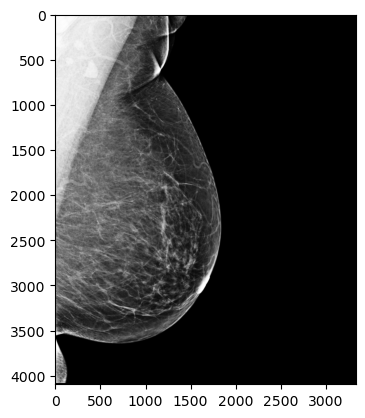

In [17]:
## checking an image
abname = nrnameList[9]
img = sitk.ReadImage(os.path.join(path_nrimg, f'{abname}.dcm'))

img = sitk.GetArrayFromImage(img)[0]
plt.imshow(img, cmap='gray')

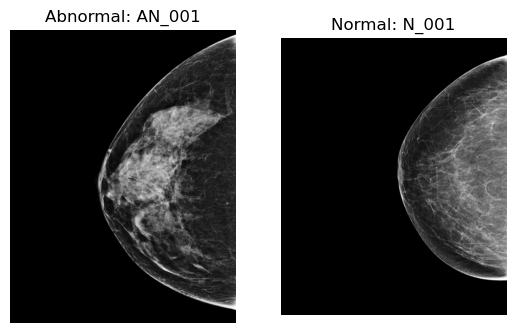

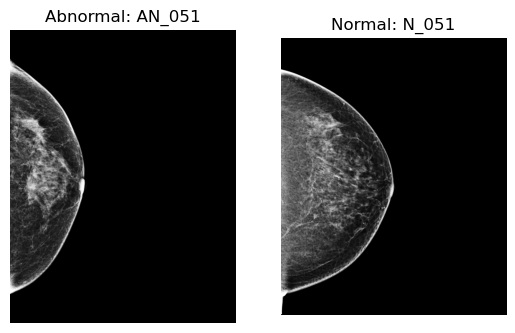

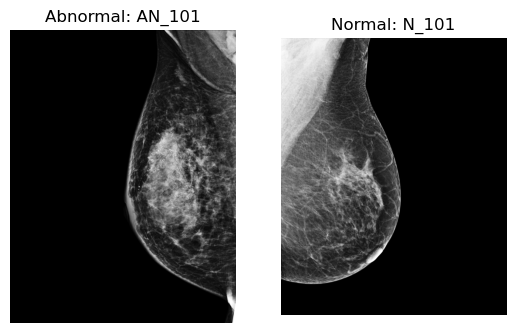

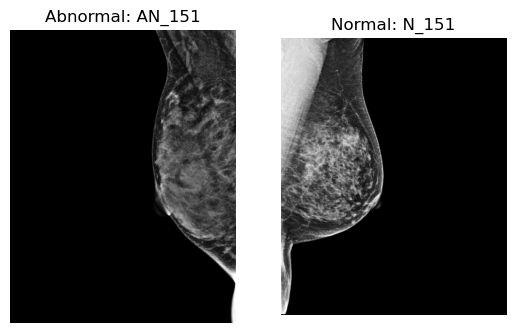

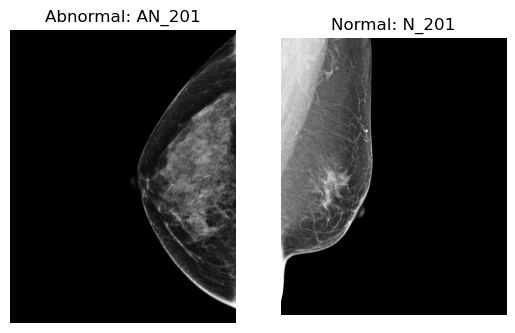

In [7]:
## checking sample images
n_sample = 5

for n in range(0, len(abnameList), len(abnameList)//n_sample):
    
    abimg = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(path_abimg, f'{abnameList[n]}.dcm')))[0]
    nrimg = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(path_nrimg, f'{nrnameList[n]}.dcm')))[0]
    
    plt.subplot(1,2,1)
    plt.title(f'Abnormal: {abnameList[n]}')
    plt.imshow(abimg,cmap='gray')
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.title(f'Normal: {nrnameList[n]}')
    plt.imshow(nrimg,cmap='gray')
    plt.axis('off')
    plt.show()

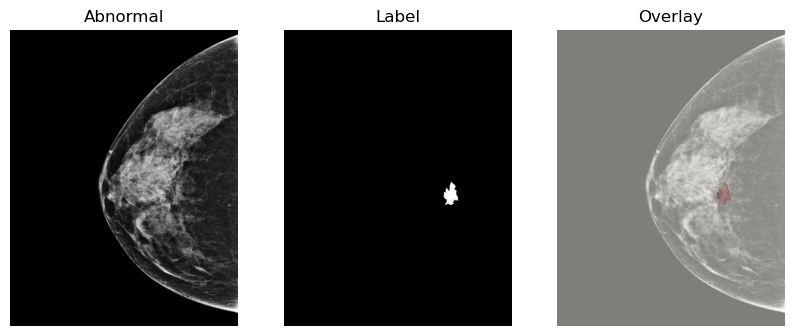

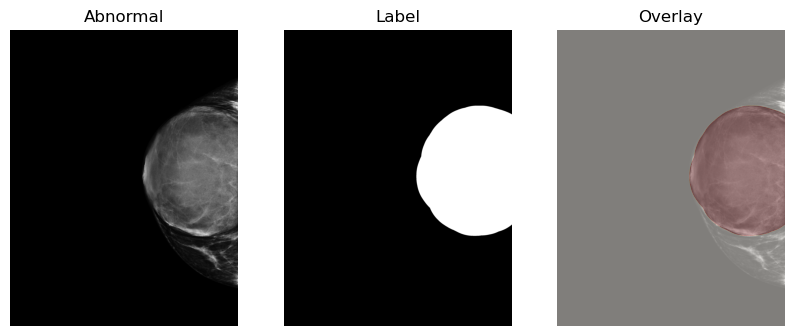

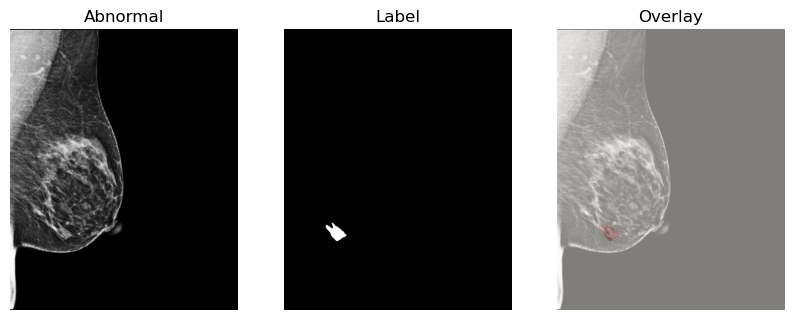

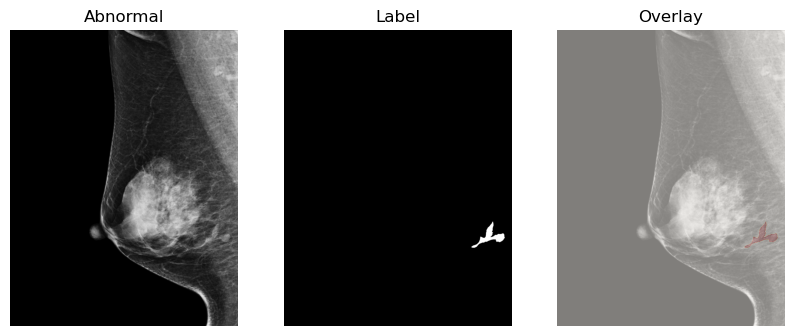

In [18]:
## checking sample images with annotation
n_sample = 3
checkList = [45,8,3,99,158]
for n in checkList:
    
    abimg = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(path_abimg, f'{abnameList[n]}.dcm')))[0]
    ablab = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join('/nas/breast/label/nii', f'{abnameList[n]}.nii')))[0]

    plt.figure(figsize=(10,30))    
    plt.subplot(1,3,1)
    plt.title(f'Abnormal')
    plt.imshow(abimg,cmap='gray')
    plt.axis('off')
    
    plt.subplot(1,3,2)
    plt.title(f'Label')
    plt.imshow(ablab,cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title(f'Overlay')
    plt.imshow(ablab,cmap='OrRd',alpha=0.5)
    plt.imshow(abimg,cmap='gray',alpha=0.5)
    plt.axis('off')
    
